In [1]:
#%% # IMPORTAZIONE LIBRERIE GENERALI

import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 5

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
sns.set_style('whitegrid')

from datetime import timedelta

#import warnings
#warnings.filterwarnings('ignore')

# Moving Average (MA)

Nel modello **Moving Average** si assume che la domanda futura sia simile, e nella fattispecie pari alla media, delle domande registrate in un periodo recente di tempo.

La **forecast** è la **media** degli ultimi n-periodi di domanda.

- $f_{t}$ --> forecast nel periodo t
- $n$ --> periodi di domanda che vengono mediati
- $d_{t}$ --> domanda nel periodo t
- $t$ --> parte da $n+1$, ciò significa che la prima forecast si ha in $f_{t} = \frac{1}{n}(d_{n} + d_{n-1} + d_{n-2} + ... + d_{0})$

$f_{t} = \frac{1}{n}\sum\limits_{i=1}^{n}d_{t-i} $

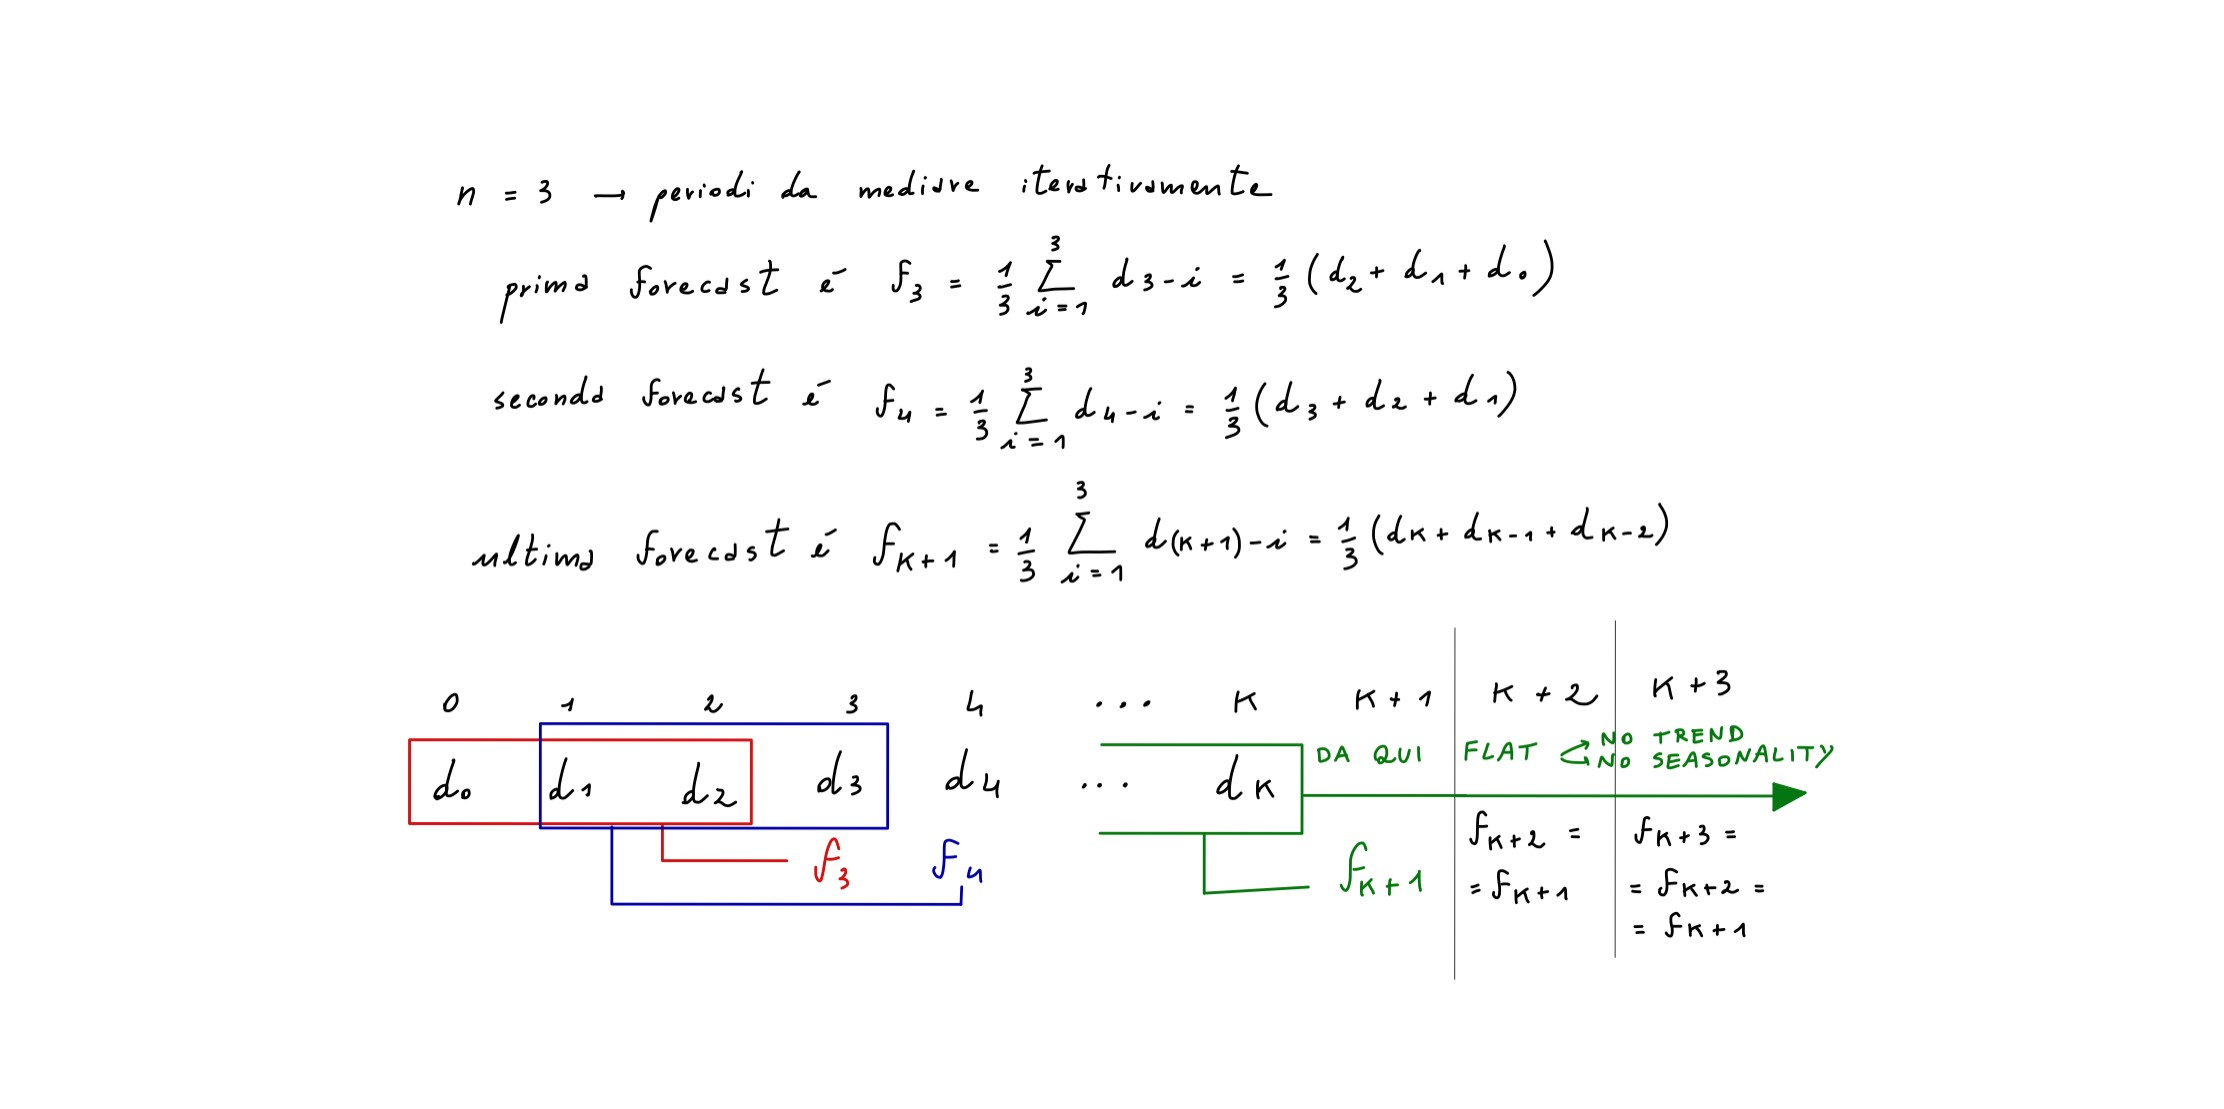

# Naive forecast

Il caso in cui n = 1, è semplicemente la serie temporale sfasata in ritardo di 1 periodo perché:

$f_{t} = \frac{1}{1}\sum\limits_{i = 1}^{1}d_{t-i} = d_{t-1}$

Questa si chiama **NAIVE FORECAST**:
- Reagisce velocemente ad ogni variazione della domanda
- Per niente robusta a rumore e outliers

# Trade-off tra velocità di reazione e robustezza ad outliers e rumore
Per creare un modello che sia maggiormente resistente ad **outliers** e **rumore** basta aumentare il numero di periodi coinvolti nella media iterativa. D'altro canto però aumentando il numero di periodi, ottengo anche un modello che reagisce lentamente a **cambiamenti del demand level**.

# Limitazione del MA
- Il modello non coglie il **trend**
- Il modello non coglie la **stagionalità**
- Il modello attribuisce **uguale peso a tutti i periodi**, senza considerare che i periodi più recenti sono in realtà più importanti dei più vecchi nel computo della forecast. Questo si risolve con lo **smorzamento esponenziale**.

# Funzione

In [2]:
[np.nan]*3

[nan, nan, nan]

In [3]:
np.full(8, np.nan)

array([nan, nan, nan, nan, nan, nan, nan, nan])

In [4]:
for t in range(1, 8):
    print(t)
print(t)

1
2
3
4
5
6
7
7


In [5]:
#VERSIONE_1

def Moving_Average(d, extra_periods, n):
    
    #INIZIALIZZO
    k = len(d)
    d = np.append(d, [np.nan]*extra_periods) # domanda
    f = np.full(k + extra_periods, np.nan) # forecast
    
    #RIEMPIO
    for t in range(n, k+1): # n incluso - k+1 escluso
        f[t] = np.mean(d[t-n : t])
    
    f[t+1 : ] = f[t] # Riempio da k+1 in fondo. Alla fine del for t vale k
    
    #Creo df
    df = pd.DataFrame({'Demand': d,
                       'Forecast':f, 
                       'Error': d-f})
    
    return(df)

In [6]:
#VERSIONE_2

def Moving_Average_variant(d, extra_periods, n):
    
    #INIZIALIZZO
    k = len(d)
    d = np.append(d, [np.nan]*extra_periods) # domanda
    f = np.full(k + extra_periods, np.nan) # forecast
    
    #RIEMPIO
    for t in range(n, k): # n incluso - k escluso
        f[t] = np.mean(d[t-n : t])
    
    f[t+1 : ] = np.mean(d[t+1-n : t+1]) # Riempio da k in fondo
    
    #Creo df
    df = pd.DataFrame({'Demand': d,
                       'Forecast':f, 
                       'Error': d-f})
    
    return(df)

In [7]:
d = [28, 19, 18, 13, 19, 16, 19, 18, 13, 16, 16, 11, 18, 15, 13, 15, 13, 11, 13, 10, 12]

In [8]:
df = Moving_Average(d, extra_periods = 3, n = 4)
df.tail()

,Demand,Forecast,Error
19,10.0,13.00,-3.00
20,12.0,11.75,0.25
21,NaN,11.50,NaN
22,NaN,11.50,NaN
23,NaN,11.50,NaN


In [9]:
df_variant = Moving_Average_variant(d, extra_periods = 3, n = 4)
df_variant.tail()

,Demand,Forecast,Error
19,10.0,13.00,-3.00
20,12.0,11.75,0.25
21,NaN,11.50,NaN
22,NaN,11.50,NaN
23,NaN,11.50,NaN


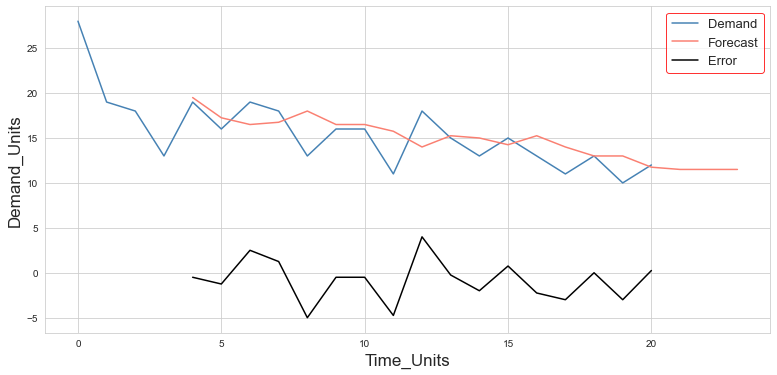

In [10]:
# Plot

fig, ax = plt.subplots(figsize = (13, 6))

ax.plot(df['Demand'], color = 'steelblue', label = 'Demand')
ax.plot(df['Forecast'], color = 'salmon', label = 'Forecast')
ax.plot(df['Error'], color = 'black', label = 'Error')

#ax.plot(df_variant['Demand'], color = 'steelblue', label = 'Demand')
#ax.plot(df_variant['Forecast'], color = 'salmon', label = 'Forecast')
#ax.plot(df_variant['Error'], color = 'black', label = 'Error')

ax.set_xlabel('Time_Units', fontsize = 17)
ax.set_ylabel('Demand_Units', fontsize = 17)

ax.legend(edgecolor = 'red', facecolor = 'white', fontsize = 13)

plt.show()

# Air Passengers

In [11]:
d = pd.read_csv(r'C:\Users\peria\Desktop\DATA SCIENCE\TIME SERIES\Data Science For Supply Chain Forecasting\AirPassengers.csv')
d['Month'] = pd.to_datetime(d['Month'], yearfirst = True)
d.set_index(d['Month'], inplace = True)
d.drop(columns = ['Month'], inplace = True)
d.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
df = Moving_Average(d.values, extra_periods = 10, n = 3)
df.tail()

,Demand,Forecast,Error
149,NaN,427.666667,NaN
150,NaN,427.666667,NaN
151,NaN,427.666667,NaN
152,NaN,427.666667,NaN
153,NaN,427.666667,NaN


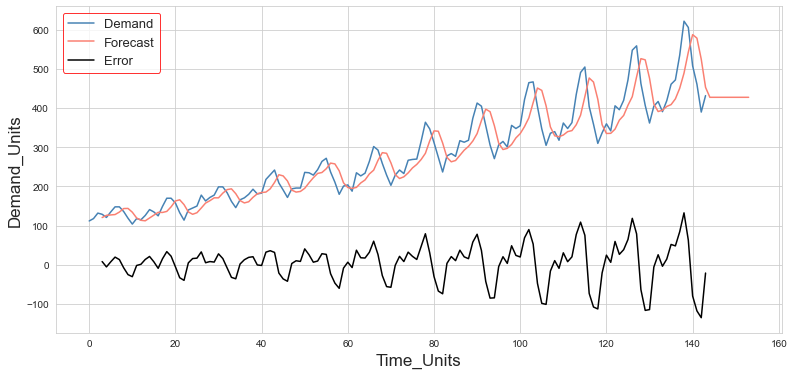

In [13]:
# Plot

fig, ax = plt.subplots(figsize = (13, 6))

ax.plot(df['Demand'], color = 'steelblue', label = 'Demand')
ax.plot(df['Forecast'], color = 'salmon', label = 'Forecast')
ax.plot(df['Error'], color = 'black', label = 'Error')

ax.set_xlabel('Time_Units', fontsize = 17)
ax.set_ylabel('Demand_Units', fontsize = 17)

ax.legend(edgecolor = 'red', facecolor = 'white', fontsize = 13)

plt.show()